In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

/Users/vk/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = np.load("/Users/vk/software/simulations/Simulations/analysis/python/test.npy")
def departitionImage(image):
    """ returns (xs, ys, zs, rs) """
    xs = []; ys = []; zs = []; rs = []
    for ilayer in range(30):
        for iy in range(30):
            for ix  in range(30):
                if image[ilayer][iy][ix]>0:
                    xs.append(ix)
                    ys.append(iy)
                    zs.append(ilayer)
                    rs.append(image[ilayer][iy][ix])
    return (xs,ys,zs,rs)

In [3]:
def draw(image_as_3darray):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    xs,ys,zs,rs = departitionImage(image_as_3darray)
    ax.scatter(xs,ys,zs, c='r', marker='o')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Layer")
    plt.show()

In [4]:
npdata = np.load("/Users/vk/software/simulations/data/hgcal/npy/20161126_1156/test.npy")

In [5]:
npdata.shape

(30000, 27001)

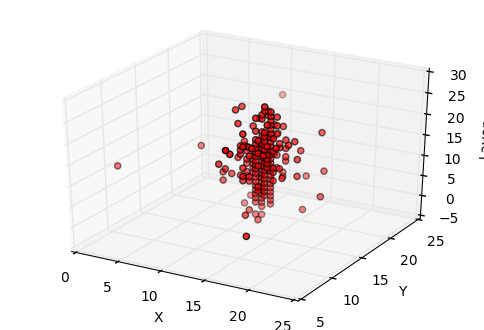

In [6]:
draw(npdata[0][1:].reshape((30,30,30)))

In [7]:
npdata[0:, 0].shape

(30000,)

In [8]:
npdata_shuffled = np.random.shuffle(npdata)

In [9]:
npdata[0:, 0]

array([ 45.,  48.,  40., ...,  25.,  22.,  27.])

In [10]:
import sklearn.neural_network as nn

In [20]:
classifier = nn.MLPRegressor(solver="sgd", alpha=1e-5, hidden_layer_sizes=(100, 50, 10), random_state=1,
    learning_rate_init=3.0)
data_x = npdata[0:, 1:]
data_y = npdata[0:, 0]
print data_x, data_x.shape
print data_y, data_y.shape

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] (30000, 27000)
[ 45.  48.  40. ...,  25.  22.  27.] (30000,)


In [21]:
classifier.fit(npdata[0:, 1:], npdata[0:, 0])

/Users/vk/anaconda/lib/python2.7/site-packages/sklearn/neural_network/_base.py:194: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/vk/anaconda/lib/python2.7/site-packages/sklearn/neural_network/_stochastic_optimizers.py:174: RuntimeWarning: invalid value encountered in subtract
  for velocity, grad in zip(self.velocities, grads)]
/Users/vk/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10), learning_rate='constant',
       learning_rate_init=3.0, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
classifier.predict(npdata[100:200, 1:])

array([  1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,   1.85568606e+23,   1.85568606e+23,
         1.85568606e+23,